# Customer Engagement Statistical Analysis Project

## A Practical Approach to Analyzing Customer Engagement Metrics

### Case Description
In 2022, there were high expectations for the growth of the 365 company and increased student engagement due to the introduction of new platform features. These included an XP system that enabled students to track their progress, level up, and earn rewards by completing various learning objectives. The platform also introduced in-app coins for special awards, a leaderboard for competitive rankings and weekly rewards, and streaks to encourage consistent learning habits. Additionally, the company expanded its course library, covering a broader range of topics to enhance students' skills and attract a larger audience.

These enhancements were anticipated to positively impact the student experience, create an effective customer engagement strategy, and contribute to the company's success. This **Customer Engagement Statistical Analysis in Python** aims to assess whether the new platform features have led to increased student engagement.

---

## Project Requirements
To conduct this analysis in Python, ensure you have the following installed:

- Python 3.7 or later
- Pandas for data manipulation
- NumPy for numerical operations
- Matplotlib and Seaborn for data visualization
- SciPy or Statsmodels for statistical analysis

---

## Project Files
This project analyzes a dataset from the 365 company. Personal user information has been anonymized for privacy, and the dataset has been optimized for analysis while maintaining its representativeness of the company’s operations.

### Dataset Overview
The dataset includes the following key columns:
- **student_id** – Unique identifier for each student.
- **student_country** – Country of the student, useful for regional analysis.
- **Paid** – Indicates whether the student had a paid account (1 = Paid, 0 = Free).
- **minutes_watched_21** – Number of minutes watched in Q4 2021.
- **minutes_watched_22** – Number of minutes watched in Q4 2022.

---

## Analysis Approach
1. **Load and Explore Data** – Read the dataset into a Pandas DataFrame and inspect its structure.
2. **Data Cleaning and Preparation** – Handle missing values, data type conversions, and inconsistencies.
3. **Exploratory Data Analysis (EDA)** –
   - Summary statistics and distributions
   - Visualizations (histograms, boxplots, bar charts)
   - Trends in student engagement
4. **Comparative Analysis** – Compare engagement levels between 2021 and 2022.
5. **Statistical Testing** – Conduct hypothesis tests to assess the impact of new features.
6. **Insights and Recommendations** – Summarize findings and provide actionable insights.

---

# Task 1: Descriptive Statistics

## Task 1.1: Engagement Comparison
In 2022, there were high expectations for increased student engagement based on new platform features such as XP tracking, in-app coins, leaderboards, and streaks. The goal of this task is to analyze engagement levels in Q4 2021 and Q4 2022.

Steps:

- Filter low-engagement users (students who watched between 1 and 100 minutes in Q4 2021).

- Compare repeated students who watched content in both Q4 2021 and Q4 2022.

- Compute descriptive statistics (mean, median, standard deviation) for these groups.

- Compare engagement between paid and free-plan subscribers.

In [5]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Loading the Excel file
xls = pd.ExcelFile("Engagement Project.xlsx")

# Preview available sheets
print(xls.sheet_names)

['Task 1 and 2', 'Task 3', 'Task 4', 'Task 5']


In [6]:
# Load "Task 1 and 2" sheet, skipping first 3 rows to align headers correctly
df_task1_2 = pd.read_excel(xls, sheet_name="Task 1 and 2", skiprows=3)
print(df_task1_2)

      Unnamed: 0  Unnamed: 1 Unnamed: 2          Unnamed: 3  \
0            NaN  student_id       paid  minutes_watched_21   
1            NaN       16979          1               13.32   
2            NaN      207114          1               40.12   
3            NaN      156680          1               17.57   
4            NaN      149601          1               42.95   
...          ...         ...        ...                 ...   
2061         NaN         NaN        NaN                 NaN   
2062         NaN         NaN        NaN                 NaN   
2063         NaN         NaN        NaN                 NaN   
2064         NaN         NaN        NaN                 NaN   
2065         NaN         NaN        NaN                 NaN   

              Unnamed: 4  Unnamed: 5  Unnamed: 6 Unnamed: 7  \
0     minutes_watched_22         NaN  student_id       paid   
1                 260.72         NaN      238865          0   
2                 387.98         NaN      247592      

### 1.1.1: Data Cleaning and Preparation

In [8]:
# Dropping completely empty columns
df_task1_2 = df_task1_2.dropna(axis=1, how='all')

# Ensuring first row is correctly set as column headers
df_task1_2.columns = df_task1_2.iloc[0]  
df_task1_2 = df_task1_2[1:].reset_index(drop=True)

# Renaming columns for clarity
df_task1_2.columns = [
    "student_id", "paid", "minutes_watched_21", "minutes_watched_22", 
    "free_student_id", "free_paid", "free_minutes_watched_21", "free_minutes_watched_22"
]

In [9]:
# Converting numerical columns to appropriate types
num_cols = ["minutes_watched_21", "minutes_watched_22", "free_minutes_watched_21", "free_minutes_watched_22"]
df_task1_2[num_cols] = df_task1_2[num_cols].apply(pd.to_numeric, errors="coerce")

# Splitting into Paid and Free DataFrames
df_paid = df_task1_2[["student_id", "paid", "minutes_watched_21", "minutes_watched_22"]].copy()
df_free = df_task1_2[["free_student_id", "free_paid", "free_minutes_watched_21", "free_minutes_watched_22"]].copy()

In [10]:
# Dropping NaN values for accurate statistical analysis
df_paid = df_paid.dropna()
df_free = df_free.dropna()

# Displaying dataset information
print("Paid Students DataFrame:\n", df_paid.head())
print("\nFree Students DataFrame:\n", df_free.head())

Paid Students DataFrame:
   student_id paid  minutes_watched_21  minutes_watched_22
0      16979    1               13.32              260.72
1     207114    1               40.12              387.98
2     156680    1               17.57              128.78
3     149601    1               42.95             7417.40
4     251499    1                4.92               10.47

Free Students DataFrame:
   free_student_id free_paid  free_minutes_watched_21  free_minutes_watched_22
0          238865         0                     1.43                   157.28
1          247592         0                     3.10                     0.10
2          195373         0                     8.45                    12.57
3          229324         0                    44.87                     1.00
4          198040         0                    61.88                     0.23


In [11]:
# Checking dataset shapes
print(f"Paid Plan Count: {df_paid.shape[0]}")
print(f"Free Plan Count: {df_free.shape[0]}")

Paid Plan Count: 457
Free Plan Count: 2065


### a) Handling missing values

In [13]:
# Checking for missing values
print(df_paid.isnull().sum())
print(df_free.isnull().sum())

student_id            0
paid                  0
minutes_watched_21    0
minutes_watched_22    0
dtype: int64
free_student_id            0
free_paid                  0
free_minutes_watched_21    0
free_minutes_watched_22    0
dtype: int64


In [14]:
#Checking for empty rows
print(df_paid.head(10))
print(df_paid.tail(10))

  student_id paid  minutes_watched_21  minutes_watched_22
0      16979    1               13.32              260.72
1     207114    1               40.12              387.98
2     156680    1               17.57              128.78
3     149601    1               42.95             7417.40
4     251499    1                4.92               10.47
5     179664    1               45.07              628.05
6     145813    1               16.98              949.90
7     160274    1               61.97             2480.43
8       9305    1               72.33              715.95
9     211124    1                1.12                5.70
    student_id paid  minutes_watched_21  minutes_watched_22
447     254337    1               60.22               56.87
448     154674    1               17.27                1.47
449     165955    1               59.03              173.55
450     255341    1                3.38               26.53
451       3297    1               33.95               12.42
45

In [15]:
#Checking for empty rows
print(df_free.head(10))
print(df_free.tail(10))

  free_student_id free_paid  free_minutes_watched_21  free_minutes_watched_22
0          238865         0                     1.43                   157.28
1          247592         0                     3.10                     0.10
2          195373         0                     8.45                    12.57
3          229324         0                    44.87                     1.00
4          198040         0                    61.88                     0.23
5           14672         0                    55.05                   114.17
6          182954         0                     3.13                     0.07
7          245547         0                    63.03                    28.90
8           37976         0                    35.17                    30.28
9          231774         0                    48.85                     0.05
     free_student_id free_paid  free_minutes_watched_21  \
2055          252825         0                    60.78   
2056          177305    

In [16]:
# Dropping the NaN values
df_paid = df_paid.dropna().reset_index(drop=True)
print(df_paid.isnull().sum())

student_id            0
paid                  0
minutes_watched_21    0
minutes_watched_22    0
dtype: int64


In [17]:
# Dropping the NaN values
df_free = df_free.dropna().reset_index(drop=True)
print(df_free.isnull().sum())

free_student_id            0
free_paid                  0
free_minutes_watched_21    0
free_minutes_watched_22    0
dtype: int64


### b) Converting Numeric Columns to Proper Data Types

In [19]:
# Converting columns to appropriate types
df_paid = df_paid.astype({
    "student_id": int, 
    "paid": int, 
    "minutes_watched_21": float, 
    "minutes_watched_22": float
})
print(df_paid)

     student_id  paid  minutes_watched_21  minutes_watched_22
0         16979     1               13.32              260.72
1        207114     1               40.12              387.98
2        156680     1               17.57              128.78
3        149601     1               42.95             7417.40
4        251499     1                4.92               10.47
..          ...   ...                 ...                 ...
452      247130     1               13.78                0.07
453        7031     1                7.97                0.37
454      223701     1               28.38               40.28
455      256834     1               13.77               69.08
456        1711     1                2.40                0.10

[457 rows x 4 columns]


In [20]:
df_free

,free_student_id,free_paid,free_minutes_watched_21,free_minutes_watched_22
0,238865,0,1.43,157.28
1,247592,0,3.10,0.10
2,195373,0,8.45,12.57
3,229324,0,44.87,1.00
4,198040,0,61.88,0.23
...,...,...,...,...
2060,203259,0,24.18,0.63
2061,243217,0,52.15,0.05
2062,236871,0,13.53,0.15
2063,204825,0,1.82,0.43


In [21]:
# Converting columns to appropriate types with correct column names
df_free = df_free.astype({
    "free_student_id": int, 
    "free_paid": int, 
    "free_minutes_watched_21": float, 
    "free_minutes_watched_22": float
})

# Verifying the data types after conversion
print(df_free.dtypes)

free_student_id              int32
free_paid                    int32
free_minutes_watched_21    float64
free_minutes_watched_22    float64
dtype: object


In [22]:
# Summary statistics for paid users and free users
print(df_paid.describe())  
print(df_free.describe())  

          student_id   paid  minutes_watched_21  minutes_watched_22
count     457.000000  457.0          457.000000          457.000000
mean   141858.282276    1.0           33.796958          273.020503
std     97589.297420    0.0           28.213543          854.575237
min       278.000000    1.0            1.000000            0.050000
25%     11711.000000    1.0            8.450000            8.120000
50%    161524.000000    1.0           26.330000           40.280000
75%    235620.000000    1.0           55.100000          183.230000
max    258782.000000    1.0           99.080000         9214.130000
       free_student_id  free_paid  free_minutes_watched_21  \
count      2065.000000     2065.0              2065.000000   
mean     190854.195642        0.0                25.391676   
std       59045.734535        0.0                26.231537   
min          20.000000        0.0                 1.000000   
25%      177702.000000        0.0                 4.470000   
50%      202806.

### 1.1.2: Filter Low-Engagement Users (Students Who Watched Between 1 and 100 Minutes in Q4 2021)

In [24]:
# Filtering paid_students who watched between 1 and 100 minutes in Q4 2021 
low_engagement_paid = df_paid[
    (df_paid["minutes_watched_21"] >= 1) &  # Selects students who watched at least 1 minute
    (df_paid["minutes_watched_21"] <= 100)  # Selects students who watched at most 100 minutes
]

# Results
print(low_engagement_paid)

     student_id  paid  minutes_watched_21  minutes_watched_22
0         16979     1               13.32              260.72
1        207114     1               40.12              387.98
2        156680     1               17.57              128.78
3        149601     1               42.95             7417.40
4        251499     1                4.92               10.47
..          ...   ...                 ...                 ...
452      247130     1               13.78                0.07
453        7031     1                7.97                0.37
454      223701     1               28.38               40.28
455      256834     1               13.77               69.08
456        1711     1                2.40                0.10

[457 rows x 4 columns]


In [25]:
# Filtering free students who watched between 1 and 100 minutes in Q4 2021
low_engagement_free = df_free[
    (df_free["free_minutes_watched_21"] >= 1) &  # Corrected column name
    (df_free["free_minutes_watched_21"] <= 100)  # Corrected column name
]

# Results
print(low_engagement_free)

      free_student_id  free_paid  free_minutes_watched_21  \
0              238865          0                     1.43   
1              247592          0                     3.10   
2              195373          0                     8.45   
3              229324          0                    44.87   
4              198040          0                    61.88   
...               ...        ...                      ...   
2060           203259          0                    24.18   
2061           243217          0                    52.15   
2062           236871          0                    13.53   
2063           204825          0                     1.82   
2064           200990          0                     1.42   

      free_minutes_watched_22  
0                      157.28  
1                        0.10  
2                       12.57  
3                        1.00  
4                        0.23  
...                       ...  
2060                     0.63  
2061       

### 1.1.3: Compare Repeated Students Who Watched Content in Both Q4 2021 and Q4 2022

In [27]:
# Filtering _paid_students who watched content in both Q4 2021 and Q4 2022
repeated_students_paid = df_paid[
    (df_paid["minutes_watched_21"] > 0) &  # Watched some content in Q4 2021
    (df_paid["minutes_watched_22"] > 0)    # Watched some content in Q4 2022
]

# Results
print(repeated_students_paid)

     student_id  paid  minutes_watched_21  minutes_watched_22
0         16979     1               13.32              260.72
1        207114     1               40.12              387.98
2        156680     1               17.57              128.78
3        149601     1               42.95             7417.40
4        251499     1                4.92               10.47
..          ...   ...                 ...                 ...
452      247130     1               13.78                0.07
453        7031     1                7.97                0.37
454      223701     1               28.38               40.28
455      256834     1               13.77               69.08
456        1711     1                2.40                0.10

[457 rows x 4 columns]


In [28]:
# Filtering free_students who watched content in both Q4 2021 and Q4 2022
repeated_students_free = df_free[
    (df_free["free_minutes_watched_21"] > 0) &  # Watched some content in Q4 2021
    (df_free["free_minutes_watched_22"] > 0)    # Watched some content in Q4 2022
]

# Results
print(repeated_students_free)

      free_student_id  free_paid  free_minutes_watched_21  \
0              238865          0                     1.43   
1              247592          0                     3.10   
2              195373          0                     8.45   
3              229324          0                    44.87   
4              198040          0                    61.88   
...               ...        ...                      ...   
2060           203259          0                    24.18   
2061           243217          0                    52.15   
2062           236871          0                    13.53   
2063           204825          0                     1.82   
2064           200990          0                     1.42   

      free_minutes_watched_22  
0                      157.28  
1                        0.10  
2                       12.57  
3                        1.00  
4                        0.23  
...                       ...  
2060                     0.63  
2061       

### 1.1.4: Compute Descriptive Statistics (Mean, Median, Standard Deviation) for These Groups
Calculate statistics for:

- Low-engagement users (Q4 2021)
- Repeated students (Q4 2021 & Q4 2022)

#### a) Low-engagement users (Q4 2021)

In [31]:
# Descriptive statistics for low-engagement paid users
low_engagement_paid_users = low_engagement_paid[["minutes_watched_21"]].describe()
print("Low-Engagement Paid Users (Q4 2021) Statistics:\n", low_engagement_paid_users)

Low-Engagement Paid Users (Q4 2021) Statistics:
        minutes_watched_21
count          457.000000
mean            33.796958
std             28.213543
min              1.000000
25%              8.450000
50%             26.330000
75%             55.100000
max             99.080000


In [32]:
# Descriptive statistics for low-engagement free users
low_engagement_free_users = low_engagement_free[["free_minutes_watched_21"]].describe()
print("Low-Engagement Free Users (Q4 2021) Statistics:\n", low_engagement_free_users)

Low-Engagement Free Users (Q4 2021) Statistics:
        free_minutes_watched_21
count              2065.000000
mean                 25.391676
std                  26.231537
min                   1.000000
25%                   4.470000
50%                  14.170000
75%                  39.500000
max                  99.680000


#### b) Repeated students (Q4 2021 & Q4 2022)

In [34]:
# Descriptive statistics for repeated paid_students
repeated_paid_students_stats = repeated_students_paid[["minutes_watched_21", "minutes_watched_22"]].describe()
print("\nRepeated Students (Q4 2021 & Q4 2022) Statistics:\n", repeated_paid_students_stats)


Repeated Students (Q4 2021 & Q4 2022) Statistics:
        minutes_watched_21  minutes_watched_22
count          457.000000          457.000000
mean            33.796958          273.020503
std             28.213543          854.575237
min              1.000000            0.050000
25%              8.450000            8.120000
50%             26.330000           40.280000
75%             55.100000          183.230000
max             99.080000         9214.130000


### 1.1.5: Compare Engagement Between Paid and Free-Plan Subscribers

In [36]:
# Checking the first few rows of both datasets
print(df_paid.head())
print(df_free.head())

   student_id  paid  minutes_watched_21  minutes_watched_22
0       16979     1               13.32              260.72
1      207114     1               40.12              387.98
2      156680     1               17.57              128.78
3      149601     1               42.95             7417.40
4      251499     1                4.92               10.47
   free_student_id  free_paid  free_minutes_watched_21  \
0           238865          0                     1.43   
1           247592          0                     3.10   
2           195373          0                     8.45   
3           229324          0                    44.87   
4           198040          0                    61.88   

   free_minutes_watched_22  
0                   157.28  
1                     0.10  
2                    12.57  
3                     1.00  
4                     0.23  


#### a) Comparing average engagement(mean, median, standard deviation) between paid and free users for both Q4 2021 and Q4 2022.

In [38]:
# Descriptive statistics for Paid Users
paid_stats = df_paid[["minutes_watched_21", "minutes_watched_22"]].describe()
print("Paid Users Engagement Statistics:\n", paid_stats)

# Descriptive statistics for Free Users
free_stats = df_free[["free_minutes_watched_21", "free_minutes_watched_22"]].describe()
print("Free Users Engagement Statistics:\n", free_stats)

Paid Users Engagement Statistics:
        minutes_watched_21  minutes_watched_22
count          457.000000          457.000000
mean            33.796958          273.020503
std             28.213543          854.575237
min              1.000000            0.050000
25%              8.450000            8.120000
50%             26.330000           40.280000
75%             55.100000          183.230000
max             99.080000         9214.130000
Free Users Engagement Statistics:
        free_minutes_watched_21  free_minutes_watched_22
count              2065.000000              2065.000000
mean                 25.391676               117.637458
std                  26.231537               468.934665
min                   1.000000                 0.050000
25%                   4.470000                 1.030000
50%                  14.170000                11.830000
75%                  39.500000                77.300000
max                  99.680000             12344.500000


#### b) Comparing Engagement Using Visualizations

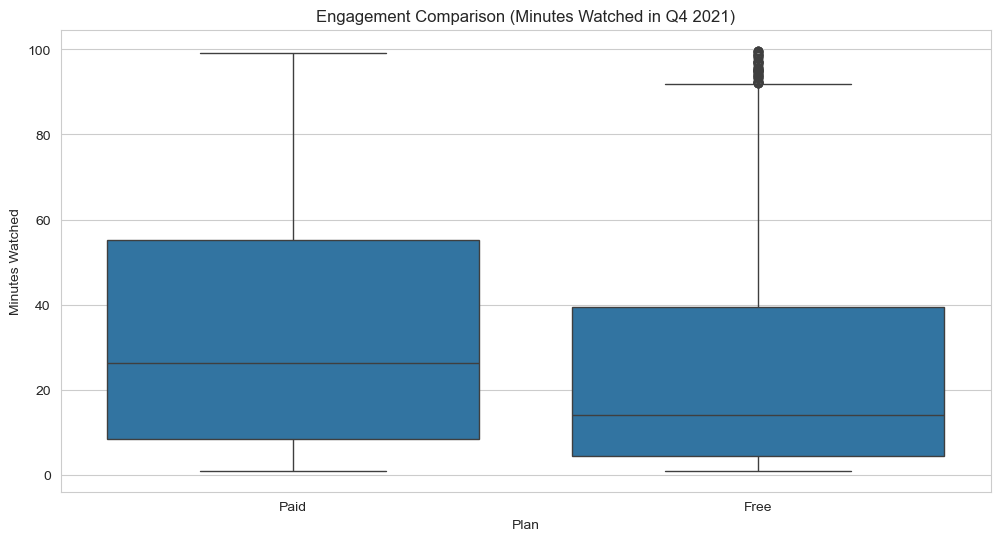

In [40]:
# Setting style
sns.set_style("whitegrid")

# Boxplot for engagement comparison
plt.figure(figsize=(12, 6))

# Combining the datasets for easier visualization
df_paid["Plan"] = "Paid"
df_free.rename(columns={
    "free_minutes_watched_21": "minutes_watched_21",
    "free_minutes_watched_22": "minutes_watched_22"
}, inplace=True)
df_free["Plan"] = "Free"

df_combined = pd.concat([df_paid, df_free], ignore_index=True)

# Creating boxplot
sns.boxplot(x="Plan", y="minutes_watched_21", data=df_combined)
plt.title("Engagement Comparison (Minutes Watched in Q4 2021)")
plt.ylabel("Minutes Watched")

#Display
plt.show()

The box plot shows that **Paid users generally watch more content** than Free users in Q4 2021. The median watch time is higher for Paid users, indicating greater engagement. However, some Free users watch as much as or more than Paid users, as seen in the outliers. This suggests **potential for converting highly engaged Free users into Paid subscribers**. Additionally, engagement among Paid users varies more widely, meaning different user behaviors exist within this group.

#### c) T-test to check engagement difference between paid and free users

In [43]:
from scipy.stats import ttest_ind, shapiro, levene

# Ensuring the columns are numeric
for col in ["minutes_watched_21", "minutes_watched_22"]:
    df_paid[col] = pd.to_numeric(df_paid[col], errors='coerce')
    df_free[col] = pd.to_numeric(df_free[col], errors='coerce')

# Dropping NaN values only from relevant columns
df_paid = df_paid.dropna(subset=["minutes_watched_21", "minutes_watched_22"]).reset_index(drop=True)
df_free = df_free.dropna(subset=["minutes_watched_21", "minutes_watched_22"]).reset_index(drop=True)

In [44]:
# Checking normality (Shapiro-Wilk test)
stat1, p1 = shapiro(df_paid["minutes_watched_21"])
stat2, p2 = shapiro(df_free["minutes_watched_21"])
print(f"Shapiro Test Paid Users: p-value={p1:.4f}")
print(f"Shapiro Test Free Users: p-value={p2:.4f}")

# Checking variance equality (Levene's test)
stat_lev, p_lev = levene(df_paid["minutes_watched_21"], df_free["minutes_watched_21"])
print(f"Levene's Test for Equal Variance: p-value={p_lev:.4f}")

# Performing Independent T-Test
t_stat, p_value = ttest_ind(df_paid["minutes_watched_21"], df_free["minutes_watched_21"], equal_var=(p_lev > 0.05))
print(f"T-Test Result: t-statistic={t_stat:.4f}, p-value={p_value:.4f}")

Shapiro Test Paid Users: p-value=0.0000
Shapiro Test Free Users: p-value=0.0000
Levene's Test for Equal Variance: p-value=0.0002
T-Test Result: t-statistic=5.8350, p-value=0.0000


The t-test results indicate a statistically significant difference in engagement (minutes watched) between paid and free-plan subscribers in Q4 2021

- **Q4 2021:** The high t-statistic (5.8350) and extremely low p-value (0.0000) suggest that paid subscribers watched significantly more content than free users
- The Shapiro-Wilk test results (p < 0.0001) indicate that both paid and free users' engagement data (minutes watched) significantly deviate from a normal distribution.
- The Levene’s test (p = 0.0002) suggests that the variance between the two groups is not equal.
- Given these violations of normality and variance homogeneity assumptions, the standard t-test may not be the most appropriate; however, running the test still provides useful insights.
- The t-test (t = 5.835, p < 0.0001) reveals a statistically significant difference in engagement between paid and free users, suggesting that paid users watch significantly more content on average than free users. 

In [46]:
# Performing Shapiro-Wilk normality test for Q4 2022
shapiro_paid_22 = shapiro(df_paid["minutes_watched_22"])
shapiro_free_22 = shapiro(df_free["minutes_watched_22"])
print(f"Shapiro Test Paid Users (Q4 2022): p-value={shapiro_paid_22.pvalue:.4f}")
print(f"Shapiro Test Free Users (Q4 2022): p-value={shapiro_free_22.pvalue:.4f}")

# Levene's test for equality of variances for Q4 2022
levene_test_22 = levene(df_paid["minutes_watched_22"], df_free["minutes_watched_22"])
print(f"Levene's Test for Equal Variance (Q4 2022): p-value={levene_test_22.pvalue:.4f}")

# Independent t-test for Q4 2022 engagement
t_test_22 = ttest_ind(df_paid["minutes_watched_22"], df_free["minutes_watched_22"], equal_var=False)
print(f"T-Test Result (Q4 2022): t-statistic={t_test_22.statistic:.4f}, p-value={t_test_22.pvalue:.4f}")

Shapiro Test Paid Users (Q4 2022): p-value=0.0000
Shapiro Test Free Users (Q4 2022): p-value=0.0000
Levene's Test for Equal Variance (Q4 2022): p-value=0.0000
T-Test Result (Q4 2022): t-statistic=3.7636, p-value=0.0002


The t-test results indicate a statistically significant difference in engagement (minutes watched) between paid and free-plan subscribers in Q4 2022.

- **Q4 2022:** The difference remains significant (t-statistic: 3.7636, p-value: 0.0002), but the effect appears smaller than in 2021, indicating that engagement levels between paid and free users may have started converging.
- The Shapiro-Wilk test results (p = 0.0000) indicate that engagement data for both paid and free users in Q4 2022 is not normally distributed.
- Levene’s test (p = 0.0000) suggests that the variance between the two groups is significantly different.
- The t-test results (t = 3.7636, p = 0.0002) show a statistically significant difference in engagement levels, with paid users watching more minutes than free users. Since the p-value is well below 0.05, we reject the null hypothesis, confirming that paid users had significantly higher engagement than free users in Q4 2022.

### 1.1.6: Histogram – Engagement Distribution (Paid vs. Free)

#### a) # Plotting histogram for Q4 2021 and Q4 2022

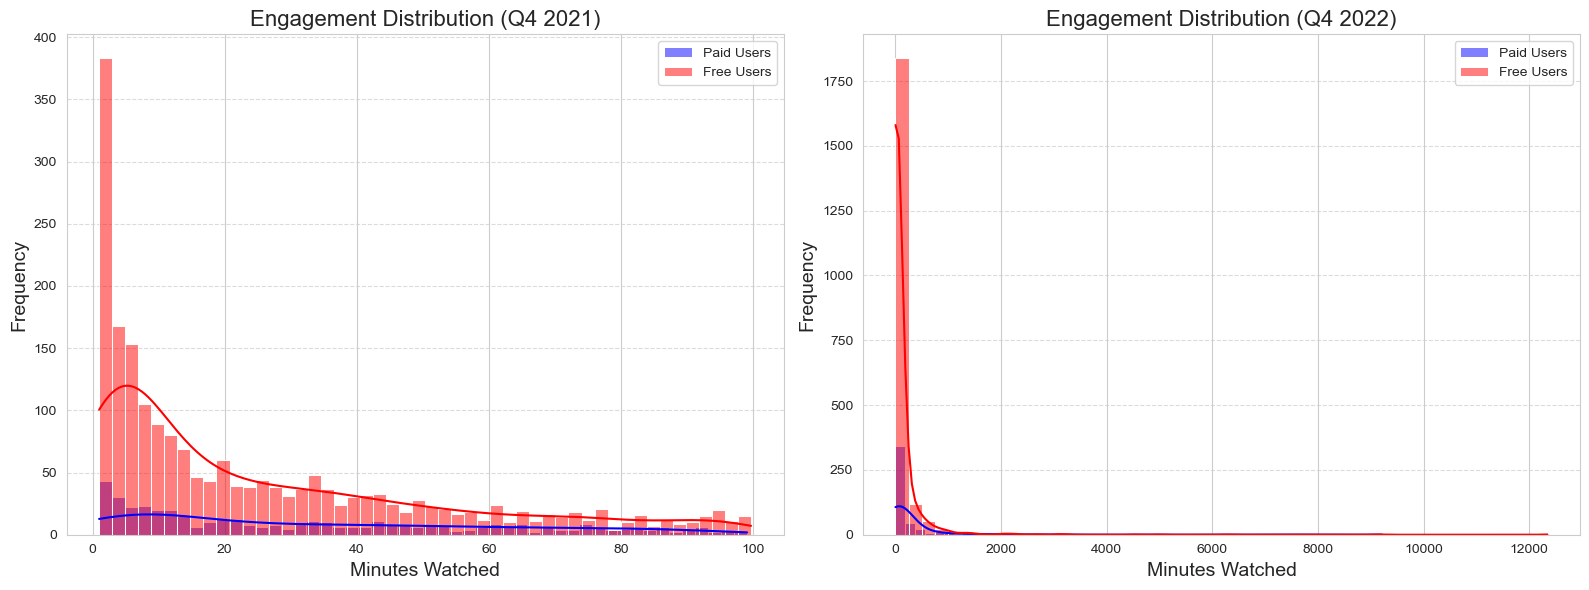

In [50]:
# Defining figure size
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 

# Histogram for Q4 2021
sns.histplot(df_paid["minutes_watched_21"], color='blue', label="Paid Users", kde=True, bins=50, alpha=0.5, ax=axes[0])
sns.histplot(df_free["minutes_watched_21"], color='red', label="Free Users", kde=True, bins=50, alpha=0.5, ax=axes[0])
axes[0].set_title("Engagement Distribution (Q4 2021)", fontsize=16)
axes[0].set_xlabel("Minutes Watched", fontsize=14)
axes[0].set_ylabel("Frequency", fontsize=14)
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Histogram for Q4 2022 
sns.histplot(df_paid["minutes_watched_22"], color='blue', label="Paid Users", kde=True, bins=50, alpha=0.5, ax=axes[1])
sns.histplot(df_free["minutes_watched_22"], color='red', label="Free Users", kde=True, bins=50, alpha=0.5, ax=axes[1])
axes[1].set_title("Engagement Distribution (Q4 2022)", fontsize=16)
axes[1].set_xlabel("Minutes Watched", fontsize=14)
axes[1].set_ylabel("Frequency", fontsize=14)
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Display
plt.tight_layout()
plt.show()

**Histogram for Q4 2021**
- The histogram shows that most users, especially free users, engage for only a short time, with engagement dropping off quickly. Paid users tend to watch slightly longer, but their numbers are significantly lower. The sharp decline in engagement suggests a need for retention strategies, particularly for free users, while paid users could benefit from incentives to increase their watch time.

**Histogram for Q4 2022**
- The histogram for Q4 2022 shows a similar trend to Q4 2021, where most users watch for only a short period, with engagement sharply decreasing as watch time increases. The spike at the lower end suggests that the majority of users, particularly free users, engage minimally. However, a few users watch for significantly longer periods, as indicated by the extended right tail. This pattern suggests a need to improve retention strategies for casual users while exploring ways to increase engagement among highly active users

### 1.1.7:  Line Plot – Engagement Trends (2021 vs. 2022)

#### Line plot comparing engagement trends in Q4 2021 vs. Q4 2022:

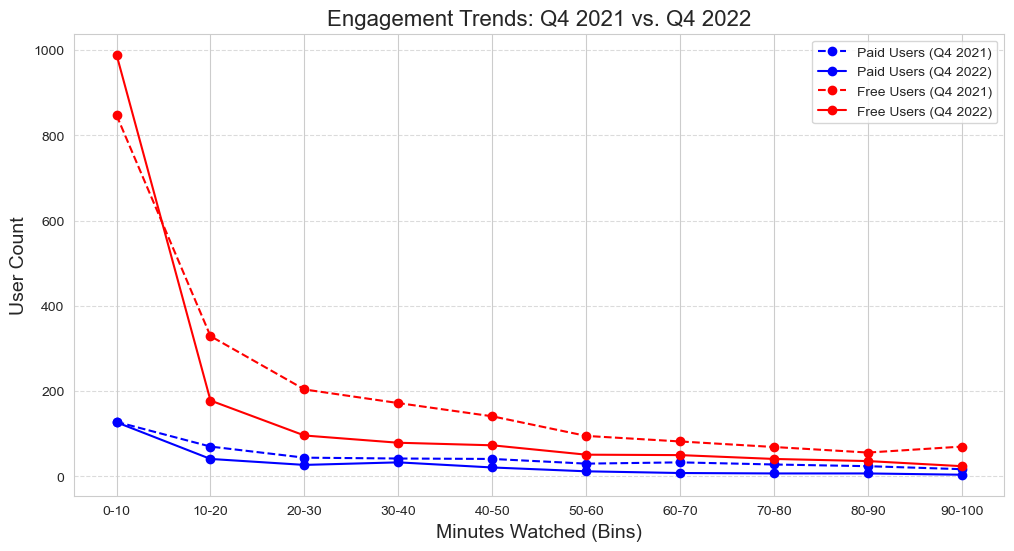

In [54]:
import numpy as np

# Defining engagement bins (grouping by minutes watched in intervals)
bins = np.arange(0, 110, 10)  # 0-10, 10-20, ..., 90-100+
labels = [f"{i}-{i+10}" for i in bins[:-1]]

# Assigning bins to the data
df_paid["bins_21"] = pd.cut(df_paid["minutes_watched_21"], bins=bins, labels=labels)
df_paid["bins_22"] = pd.cut(df_paid["minutes_watched_22"], bins=bins, labels=labels)

df_free["bins_21"] = pd.cut(df_free["minutes_watched_21"], bins=bins, labels=labels)
df_free["bins_22"] = pd.cut(df_free["minutes_watched_22"], bins=bins, labels=labels)

# Counting how many users fall into each bin
paid_counts_21 = df_paid["bins_21"].value_counts().sort_index()
paid_counts_22 = df_paid["bins_22"].value_counts().sort_index()

free_counts_21 = df_free["bins_21"].value_counts().sort_index()
free_counts_22 = df_free["bins_22"].value_counts().sort_index()

# Creating line plot
plt.figure(figsize=(12, 6))

plt.plot(labels, paid_counts_21, label="Paid Users (Q4 2021)", color="blue", linestyle="dashed", marker="o")
plt.plot(labels, paid_counts_22, label="Paid Users (Q4 2022)", color="blue", linestyle="solid", marker="o")

plt.plot(labels, free_counts_21, label="Free Users (Q4 2021)", color="red", linestyle="dashed", marker="o")
plt.plot(labels, free_counts_22, label="Free Users (Q4 2022)", color="red", linestyle="solid", marker="o")

plt.xlabel("Minutes Watched (Bins)", fontsize=14)
plt.ylabel("User Count", fontsize=14)
plt.title("Engagement Trends: Q4 2021 vs. Q4 2022", fontsize=16)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display
plt.show()

- The line chart tracks the change in engagement from Q4 2021 to Q4 2022.
- If the trend increases, it suggests successful platform improvements and higher student interaction.

**Interpretation:**
- The line plot compares engagement trends in Q4 2021 vs. Q4 2022 for both free and paid users based on minutes watched. 
- Free users (red lines) have higher initial engagement but drop off sharply after 10 minutes, while paid users (blue lines) show lower numbers but more consistent viewing patterns.
- In Q4 2022, engagement slightly improved for both groups, suggesting better retention efforts. The trend indicates that free users disengage quickly, highlighting an opportunity to convert them into paying subscribers, while paid users remain more engaged, reinforcing the value of premium content.

## Task 1.2: Skewness and Kurtosis Analysis

To further understand the distribution of engagement levels:

Steps:

- Calculate skewness and kurtosis for students who watched content in Q4 2021 and Q4 2022.

- Perform separate calculations for paid and free-plan students.

- Assess whether the skewness and kurtosis results align with the mean and median values obtained previously.

Skewness and kurtosis help us understand the shape of the engagement distribution.

- **Skewness:** Measures asymmetry in the data distribution.
    - Positive skew: More users watched fewer minutes.
    - Negative skew: More users watched longer durations.

- **Kurtosis:** Measures the "tailedness" of the distribution.
    - High kurtosis: More extreme values (long-tail engagement).
    - Low kurtosis: Fewer extreme values.

In [58]:
from scipy.stats import skew, kurtosis

# Calculating skewness and kurtosis for Paid users (1 = Paid)
skew_q4_2021_paid = skew(df_task1_2[df_task1_2['paid'] == 1]['minutes_watched_21'])
kurt_q4_2021_paid = kurtosis(df_task1_2[df_task1_2['paid'] == 1]['minutes_watched_21'])

skew_q4_2022_paid = skew(df_task1_2[df_task1_2['paid'] == 1]['minutes_watched_22'])
kurt_q4_2022_paid = kurtosis(df_task1_2[df_task1_2['paid'] == 1]['minutes_watched_22'])

# Filter out extreme outliers (e.g., above 99th percentile)
free_q4_21_filtered = df_task1_2['free_minutes_watched_21'][df_task1_2['free_minutes_watched_21'] < df_task1_2['free_minutes_watched_21'].quantile(0.99)]
free_q4_22_filtered = df_task1_2['free_minutes_watched_22'][df_task1_2['free_minutes_watched_22'] < df_task1_2['free_minutes_watched_22'].quantile(0.99)]

# Calculating skewness and kurtosis for Free users (0 = Free)
skew_q4_21_free = skew(free_q4_21_filtered)
kurt_q4_21_free = kurtosis(free_q4_21_filtered)

skew_q4_22_free = skew(free_q4_22_filtered)
kurt_q4_22_free = kurtosis(free_q4_22_filtered)

# Results
print("Q4 2021 - Paid Users: Skewness =", skew_q4_2021_paid, ", Kurtosis =", kurt_q4_2021_paid)
print(f"Q4 2021 - Free Users: Skewness = {skew_q4_21_free}, Kurtosis = {kurt_q4_21_free}")
print("Q4 2022 - Paid Users: Skewness =", skew_q4_2022_paid, ", Kurtosis =", kurt_q4_2022_paid)
print(f"Q4 2022 - Free Users: Skewness = {skew_q4_22_free}, Kurtosis = {kurt_q4_22_free}")

Q4 2021 - Paid Users: Skewness = 0.6231039033886645 , Kurtosis = -0.8531191386590518
Q4 2021 - Free Users: Skewness = 1.156683947471498, Kurtosis = 0.3402238815327987
Q4 2022 - Paid Users: Skewness = 7.042383202131584 , Kurtosis = 57.83393566028901
Q4 2022 - Free Users: Skewness = 3.6198980723900234, Kurtosis = 15.575050901493384


**Interpretation of Skewness & Kurtosis for Q4 2021 & Q4 2022 Engagement Levels:**

**Q4 2021 - Paid Users**
- Skewness (0.62): Slightly right-skewed, meaning most users watched lower minutes, but a few outliers watched significantly more.
- Kurtosis (-0.85): Platykurtic (flatter distribution), indicating engagement levels are more evenly spread out with fewer extreme peaks.

**Q4 2021 - Free Users**
- Skewness (1.16): Moderately right-skewed, suggesting most free users watched relatively low minutes, but some watched much more.
- Kurtosis (0.34): Mesokurtic (close to normal), meaning engagement levels have a balance between peaks and spread.

**Q4 2022 - Paid Users**
- Skewness (7.04): Highly right-skewed, meaning the majority watched very low minutes, but a few extreme outliers watched significantly more.
- Kurtosis (57.83): Leptokurtic (heavy-tailed), indicating the presence of extreme peaks and highly concentrated engagement levels.

**Q4 2022 - Free Users**
- Skewness (3.62): Strong right-skew, suggesting that most users had low engagement, but a small group watched significantly more.
- Kurtosis (15.58): Leptokurtic, showing high concentration around the mean with a few extreme outliers driving sharp peaks.

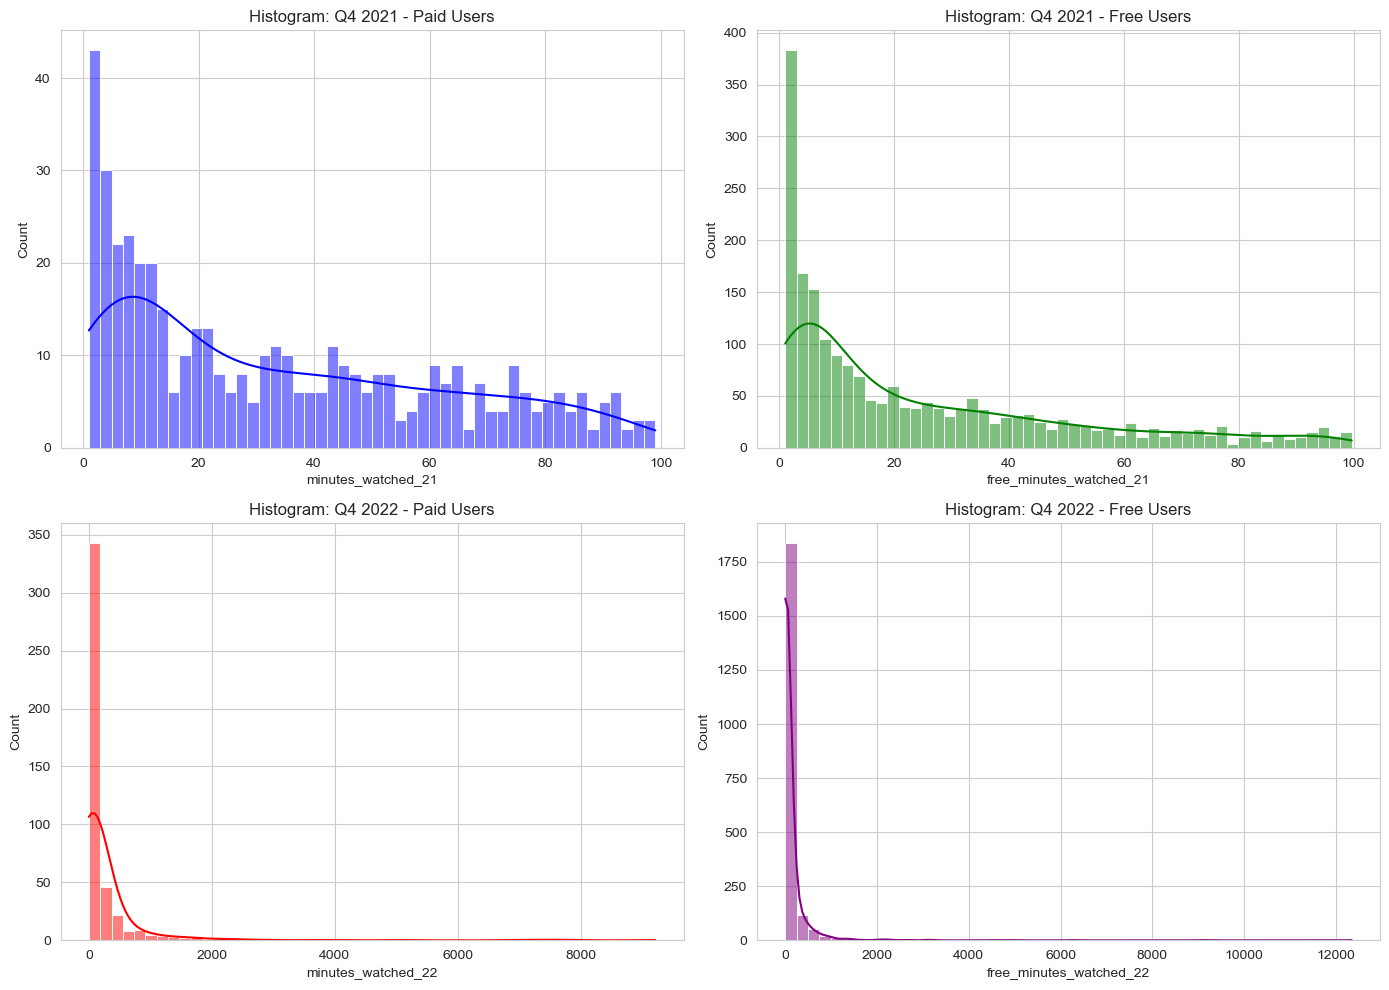

In [60]:
# Creating a 2x2 subplot 
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plotting histograms for each category
sns.histplot(df_task1_2["minutes_watched_21"], bins=50, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Histogram: Q4 2021 - Paid Users")

sns.histplot(df_task1_2["free_minutes_watched_21"], bins=50, kde=True, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Histogram: Q4 2021 - Free Users")

sns.histplot(df_task1_2["minutes_watched_22"], bins=50, kde=True, ax=axes[1, 0], color="red")
axes[1, 0].set_title("Histogram: Q4 2022 - Paid Users")

sns.histplot(df_task1_2["free_minutes_watched_22"], bins=50, kde=True, ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Histogram: Q4 2022 - Free Users")

# Display
plt.tight_layout()
plt.show()

- Paid users in 2021 had a more balanced distribution, while in 2022, a few users dominated the engagement (high skewness & kurtosis).
- Free users consistently had right-skewed distributions, but engagement became even more extreme in 2022.
- Q4 2022 data suggests that both paid and free engagement were driven by a small group of highly active users.

# Task 2: Confidence Intervals

## Task 2.1: Confidence Intervals for Engagement Levels

For each of the following groups, calculate the 95% confidence interval for minutes watched:

- Free-plan students in Q4 2021

- Free-plan students in Q4 2022

- Paid-plan students in Q4 2021

- Paid-plan students in Q4 2022

- Use the z-statistic for calculations.

In [64]:
# Loading Task 3 sheet
df_task3 = pd.read_excel("Engagement Project.xlsx", sheet_name="Task 3", header=None)  

# Preview the first few rows 
print(df_task3.head(10))

    0                   1                   2   3                   4  \
0 NaN              Task 3                 NaN NaN                 NaN   
1 NaN                 NaN                 NaN NaN                 NaN   
2 NaN  Paid-Plan Students                 NaN NaN  Free-plan Students   
3 NaN                 NaN                 NaN NaN                 NaN   
4 NaN  minutes_watched_21  minutes_watched_22 NaN  minutes_watched_21   
5 NaN             2973.67             4110.17 NaN             4716.68   
6 NaN             2939.48             4099.42 NaN              4670.7   
7 NaN             2860.78              4085.2 NaN             4622.35   
8 NaN             2853.73             4064.35 NaN             4617.75   
9 NaN              2830.2             4024.33 NaN             4599.53   

                    5  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4  minutes_watched_22  
5             6338.07  
6             6280.12  
7   

In [65]:
# Reloading Data properly to adrress header issues
df_task3 = pd.read_excel("Engagement Project.xlsx", sheet_name="Task 3", skiprows=5, header=None)

# Selecting only the relevant columns (ignoring empty ones)
df_task3 = df_task3.iloc[:, [1, 2, 4, 5]]

# Renaming columns properly
df_task3.columns = [
    "Paid_Minutes_Watched_21", "Paid_Minutes_Watched_22",
    "Free_Minutes_Watched_21", "Free_Minutes_Watched_22"
]

# Dropping any fully empty rows 
df_task3 = df_task3.dropna(how='all')
print(df_task3.head())

   Paid_Minutes_Watched_21  Paid_Minutes_Watched_22  Free_Minutes_Watched_21  \
0                  2973.67                  4110.17                  4716.68   
1                  2939.48                  4099.42                  4670.70   
2                  2860.78                  4085.20                  4622.35   
3                  2853.73                  4064.35                  4617.75   
4                  2830.20                  4024.33                  4599.53   

   Free_Minutes_Watched_22  
0                  6338.07  
1                  6280.12  
2                  6250.32  
3                  6208.80  
4                  6204.55  


In [66]:
import numpy as np
import scipy.stats as stats

# Dataset (minutes watched)
free_2021 = df_task3["Free_Minutes_Watched_21"].dropna()
free_2022 = df_task3["Free_Minutes_Watched_22"].dropna()
paid_2021 = df_task3["Paid_Minutes_Watched_21"].dropna()
paid_2022 = df_task3["Paid_Minutes_Watched_22"].dropna()

# Calculating 95% confidence interval using z-statistic
def confidence_interval(data):
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Sample standard deviation
    n = len(data)
    z_score = stats.norm.ppf(0.975)  # 1.96 for 95% CI
    margin_of_error = z_score * (std_dev / np.sqrt(n))
    return mean - margin_of_error, mean + margin_of_error

# Computing confidence intervals
ci_free_2021 = confidence_interval(free_2021)
ci_free_2022 = confidence_interval(free_2022)
ci_paid_2021 = confidence_interval(paid_2021)
ci_paid_2022 = confidence_interval(paid_2022)

# Results
print(f"Ci_free_2021: {ci_free_2021}")
print(f"Ci_free_2022: {ci_free_2022}")
print(f"Ci_paid_2021: {ci_paid_2021}")
print(f"Ci_paid_2022: {ci_paid_2022}")

Ci_free_2021: (129.92009879467778, 137.94652704847286)
Ci_free_2022: (67.70530527330419, 70.59000560537771)
Ci_paid_2021: (316.24981108164434, 348.7552049393287)
Ci_paid_2022: (351.9927982653683, 384.7166296343183)


**Interpretation of Confidence Intervals (95%):**

1. **Free-plan students in Q4 2021 (129.92, 137.95)**
- We are 95% confident that the true average minutes watched by free-plan students in Q4 2021 falls between 129.92 and 137.95 minutes.

2. **Free-plan students in Q4 2022 (67.71, 70.59)**
- The true average minutes watched by free-plan students in Q4 2022 is likely between 67.71 and 70.59 minutes.
- Compared to 2021, this shows a significant drop in watch time for free-plan students.

3. **Paid-plan students in Q4 2021 (316.25, 348.76)**
- Paid users in Q4 2021 likely watched between 316.25 and 348.76 minutes on average.

4. **Paid-plan students in Q4 2022 (351.99, 384.72)**
- In 2022, paid users' watch time is estimated to be between 351.99 and 384.72 minutes.
- There's a notable increase in watch time for paid users compared to 2021.

**Key Insights:**
- Free-plan students are watching significantly less in 2022 than in 2021. This could indicate reduced engagement, possible content restrictions, or a shift in platform strategy.
- Paid-plan students are watching more in 2022 than in 2021. This suggests higher engagement or satisfaction among paying users, possibly due to better content offerings or incentives.
- The gap between free and paid users has widened. While paid users are increasing their engagement, free users are decreasing their watch time. This could indicate a strategic move towards monetization or a decline in content appeal for non-paying users.

# Task 3: Hypothesis Testing

## Task 3.1: Effect of New Features on Engagement

Perform hypothesis testing to determine if new features increased engagement. Test separately for free-plan and paid-plan students:

- Null Hypothesis: Engagement in Q4 2021 is higher than or equal to Q4 2022 (μ1 ≥ μ2)

- Alternative Hypothesis: Engagement in Q4 2022 is greater than Q4 2021 (μ1 < μ2)

Perform:

- Two-sample t-test assuming unequal variances

- Optional: Two-sample f-test for variances

- Discuss Type I and Type II errors and their cost implications for the company.

#### a) Perform Two-sample t-test assuming unequal variances

In [70]:
# Dropping NaN values from each group
free_2021 = df_task3["Free_Minutes_Watched_21"].dropna()
free_2022 = df_task3["Free_Minutes_Watched_22"].dropna()
paid_2021 = df_task3["Paid_Minutes_Watched_21"].dropna()
paid_2022 = df_task3["Paid_Minutes_Watched_22"].dropna()

# Ensuring variance is non-zero before running statistical tests
if free_2021.var() == 0 or free_2022.var() == 0:
    print("Variance is zero in at least one Free-plan dataset. Statistical test cannot be performed.")
else:
    # Performing Welch's t-test
    t_stat_free, p_value_free = stats.ttest_ind(free_2022, free_2021, equal_var=False, alternative='greater')

    print(f"Free-plan t-statistic: {t_stat_free:.4f}, p-value: {p_value_free:.4f}")

    if p_value_free < 0.05:
        print("Reject Null Hypothesis for Free-plan: Engagement increased in Q4 2022.")
    else:
        print("Fail to Reject Null Hypothesis for Free-plan: No significant increase in engagement.")

if paid_2021.var() == 0 or paid_2022.var() == 0:
    print("Variance is zero in at least one Paid-plan dataset. Statistical test cannot be performed.")
else:
    # Performing Welch's t-test
    t_stat_paid, p_value_paid = stats.ttest_ind(paid_2022, paid_2021, equal_var=False, alternative='greater')

    print(f"Paid-plan t-statistic: {t_stat_paid:.4f}, p-value: {p_value_paid:.4f}")

    if p_value_paid < 0.05:
        print("Reject Null Hypothesis for Paid-plan: Engagement increased in Q4 2022.")
    else:
        print("Fail to Reject Null Hypothesis for Paid-plan: No significant increase in engagement.")

Free-plan t-statistic: -29.7752, p-value: 1.0000
Fail to Reject Null Hypothesis for Free-plan: No significant increase in engagement.
Paid-plan t-statistic: 3.0469, p-value: 0.0012
Reject Null Hypothesis for Paid-plan: Engagement increased in Q4 2022.


**Interpretation:**
1. **Free-plan Students**
- **t-statistic:** -29.7752:  -**p-value:** 1.0000
- **Decision:** Fail to Reject Null Hypothesis (H₀: μ₁ ≥ μ₂)

**Conclusion:** There is no significant increase in engagement for free-plan students in Q4 2022 compared to Q4 2021. The negative t-statistic suggests that engagement in 2022 might have decreased compared to 2021, but the p-value (1.0000) confirms that this change is not statistically significant.

**Business Implication:** The new features did not drive engagement among free-plan users. The company may need to investigate why free users were not influenced—perhaps they prefer different types of content, or external factors affected their usage.

2. **Paid-plan Students**
- **t-statistic:** 3.0469   - **p-value:** 0.0012
- **Decision:** Reject Null Hypothesis (H₀: μ₁ ≥ μ₂)

**Conclusion:** There is a statistically significant increase in engagement for paid-plan students in Q4 2022 compared to Q4 2021. The positive t-statistic and very low p-value (0.0012) indicate that engagement among paying users meaningfully improved after implementing the new features.

**Business Implication:** The new features were effective in increasing engagement among paid users. The company should consider analyzing what specific features worked and exploring ways to extend similar benefits to free users to encourage conversions from free to paid plans.

#### b) Two-sample f-test for variances for free and Paid plans

In [73]:
# Computing variances
var_free_2021 = free_2021.var(ddof=1)  # Sample variance
var_free_2022 = free_2022.var(ddof=1)
var_paid_2021 = paid_2021.var(ddof=1)
var_paid_2022 = paid_2022.var(ddof=1)

# Computing F-statistics
F_stat_free = var_free_2021 / var_free_2022
F_stat_paid = var_paid_2021 / var_paid_2022

# Computing degrees of freedom
df1_free = len(free_2021) - 1
df2_free = len(free_2022) - 1
df1_paid = len(paid_2021) - 1
df2_paid = len(paid_2022) - 1

# Computing p-values (two-tailed test)
p_value_f_free = 2 * min(stats.f.cdf(F_stat_free, df1_free, df2_free), 
                         1 - stats.f.cdf(F_stat_free, df1_free, df2_free))

p_value_f_paid = 2 * min(stats.f.cdf(F_stat_paid, df1_paid, df2_paid), 
                         1 - stats.f.cdf(F_stat_paid, df1_paid, df2_paid))

# Setting significance level
alpha = 0.05

# Results
print(f"Free-plan F-statistic: {F_stat_free:.4f}, p-value: {p_value_f_free:.4f}")
print(f"Paid-plan F-statistic: {F_stat_paid:.4f}, p-value: {p_value_f_paid:.4f}")

# Interpretation
if p_value_f_free < alpha:
    print("Significant difference in variance for Free-plan students.")
else:
    print("No significant difference in variance for Free-plan students.")

if p_value_f_paid < alpha:
    print("Significant difference in variance for Paid-plan students.")
else:
    print("No significant difference in variance for Paid-plan students.")

Free-plan F-statistic: 2.0642, p-value: 0.0000
Paid-plan F-statistic: 0.6637, p-value: 0.0000
Significant difference in variance for Free-plan students.
Significant difference in variance for Paid-plan students.


**Interpretation of the F-Test:**
- The F-test for variances determines whether the variances of two populations are significantly different.

1. **Free-plan Students**
**F-statistic** = 2.0642,   **p-value** = 0.0000
- **Decision:** Since the p-value is less than 0.05 (α = 0.05), we reject the null hypothesis.
- This means that there is a significant difference in variance between Q4 2021 and Q4 2022 for free-plan students.
- A higher variance in engagement could indicate inconsistent usage patterns, with some users engaging a lot while others barely engage.

2. **Paid-plan Students**
F-statistic = 0.6637, p-value = 0.0000
- **Decision:** The p-value is also less than 0.05, so we reject the null hypothesis.
- There is a significant difference in variance for paid-plan students between Q4 2021 and Q4 2022. This suggests that engagement behavior among paid users changed considerably, potentially due to new features, promotions, or external factors affecting user engagement.

**Business Implications:**
- **For Free-plan Students:** The increased variance means engagement levels are more unpredictable. Some users might have responded well to new features, while others didn’t. The company might need to further analyze user behavior to understand why engagement is inconsistent.

- **For Paid-plan Students:** A shift in variance suggests that some paid users changed their engagement levels significantly. Since we previously found that paid-plan engagement increased, this may indicate a positive response to the new features. The company could leverage these insights to enhance retention strategies and encourage continued engagement growth.

**Boxplot for f-test for variances for free and Paid plans**

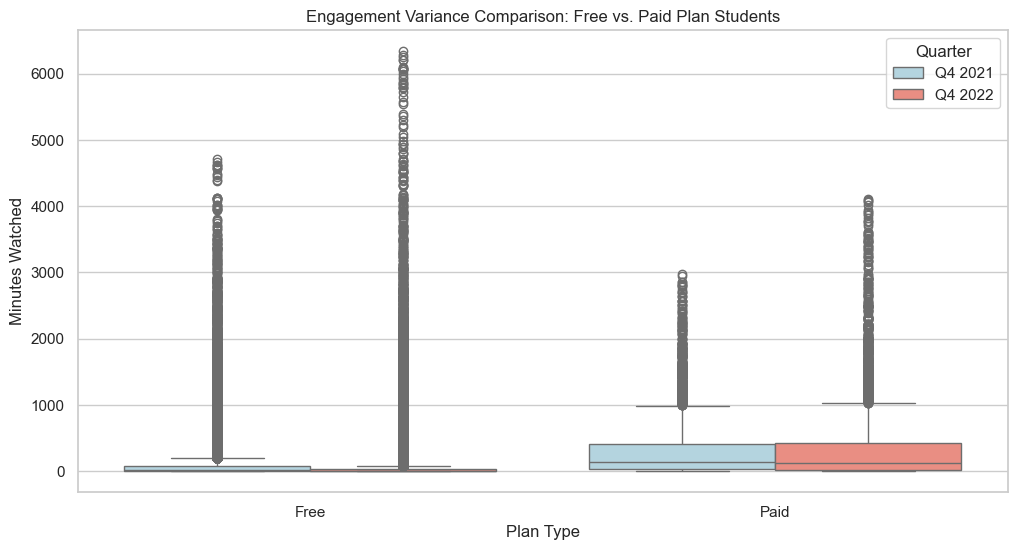

In [76]:
# Ensuring all arrays exist and are not empty
if any(arr is None or len(arr) == 0 for arr in [free_2021, free_2022, paid_2021, paid_2022]):
    raise ValueError("One or more datasets are missing or empty.")

# Creating labels based on actual dataset lengths
df = pd.DataFrame({
    'Minutes Watched': np.concatenate([free_2021, free_2022, paid_2021, paid_2022]),
    'Plan': (['Free'] * len(free_2021) + ['Free'] * len(free_2022) +
             ['Paid'] * len(paid_2021) + ['Paid'] * len(paid_2022)),
    'Quarter': (['Q4 2021'] * len(free_2021) + ['Q4 2022'] * len(free_2022) +
                ['Q4 2021'] * len(paid_2021) + ['Q4 2022'] * len(paid_2022))
})

# Setting plot style
sns.set(style="whitegrid")

# Creating Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x="Plan", y="Minutes Watched", hue="Quarter", data=df, palette=["lightblue", "salmon"])
plt.title("Engagement Variance Comparison: Free vs. Paid Plan Students")
plt.ylabel("Minutes Watched")
plt.xlabel("Plan Type")
plt.legend(title="Quarter")
plt.show()

**Histogram for f-test for variances for free and Paid plans**

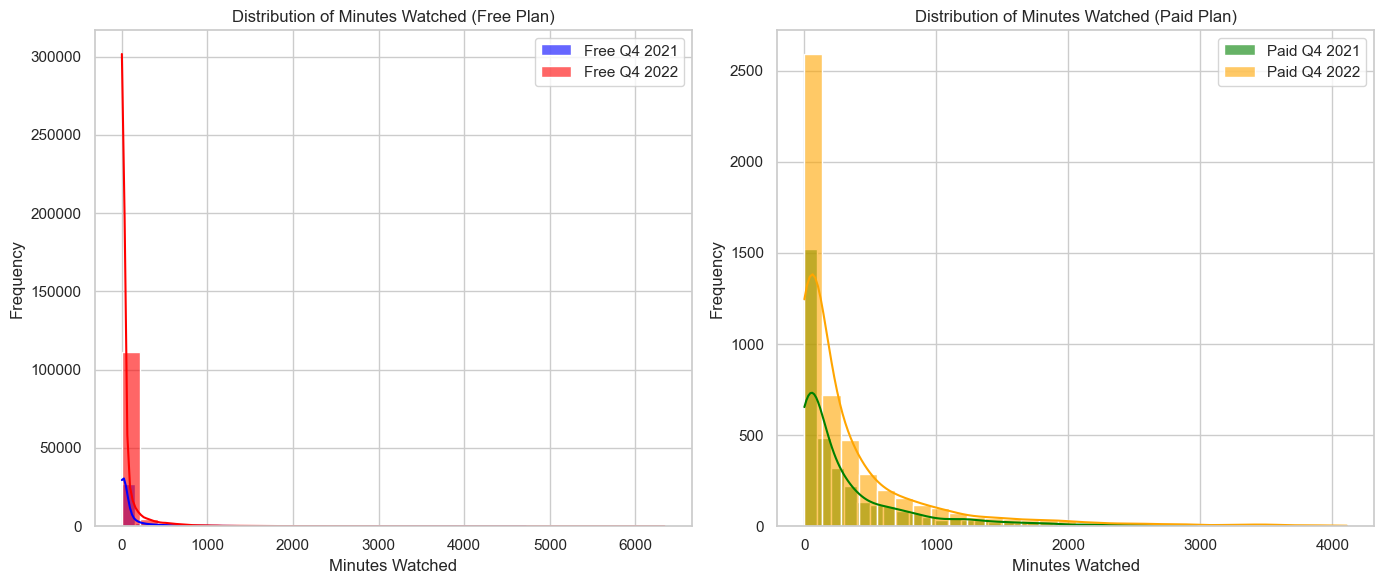

In [78]:
# Plotting Histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  

# Free Plan Histogram
sns.histplot(free_2021, bins=30, color="blue", label="Free Q4 2021", kde=True, alpha=0.6, ax=axes[0])
sns.histplot(free_2022, bins=30, color="red", label="Free Q4 2022", kde=True, alpha=0.6, ax=axes[0])
axes[0].set_title("Distribution of Minutes Watched (Free Plan)")
axes[0].set_xlabel("Minutes Watched")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# Paid Plan Histogram
sns.histplot(paid_2021, bins=30, color="green", label="Paid Q4 2021", kde=True, alpha=0.6, ax=axes[1])
sns.histplot(paid_2022, bins=30, color="orange", label="Paid Q4 2022", kde=True, alpha=0.6, ax=axes[1])
axes[1].set_title("Distribution of Minutes Watched (Paid Plan)")
axes[1].set_xlabel("Minutes Watched")
axes[1].set_ylabel("Frequency")
axes[1].legend()

# Display
plt.tight_layout()
plt.show()

### c) Discussing Type I and Type II errors and their cost implications for the company

1. **Type I Error (False Positive)**
- This occurs when we incorrectly reject the null hypothesis, meaning we conclude that engagement increased when it actually did not.

**Implications for the Company:**
- The company may assume that new features improved engagement and continue investing in them. However, if engagement did not actually improve, this would lead to wasted resources, time, and marketing efforts on ineffective features. The company may overlook real issues causing lower engagement, such as content quality, pricing, or user experience challenges.

2. **Type II Error (False Negative)**
- This occurs when we fail to reject the null hypothesis, meaning we conclude that engagement did not increase when it actually did.

**Implication for the Company:**
- The company may abandon or roll back new features that were actually effective in increasing engagement. This could lead to missed revenue opportunities if the features were driving higher subscription renewals, upsells, or user retention. Competitive disadvantage if competitors capitalize on similar features and gain market share.

**Error Trade-off and Business Strategy:**
- A Type I error is riskier when resources are limited, as the company might waste budget on ineffective features.
- A Type II error is riskier if engagement is a key success metric, as valuable innovations might be discarded.
- To minimize both errors, the company should use larger sample sizes, refine statistical methods, and validate results with A/B testing before company-wide rollouts.

# Task 4: Regional Engagement Analysis

## Task 4.1: US vs. India Engagement Comparison

Compare engagement levels between free-plan students in the US and India in 2022.

- Null Hypothesis: Engagement in the US is higher than or equal to India (μ1 ≥ μ2)

- Alternative Hypothesis: Engagement in the US is lower than India (μ1 < μ2)

Perform:

- Two-sample t-test assuming unequal variances

- Optional: Two-sample f-test for variances

- Analyze the results and determine if engagement differs significantly between these regions.

#### 4.1.1 Loading and Cleaning of the Dataset

In [83]:
import scipy.stats as stats

# Loading dataset, skipping irrelevant rows
file_path = "Engagement Project.xlsx"
df = pd.read_excel(file_path, sheet_name="Task 5", skiprows=4, header=0)

# Dropping completely empty columns
df = df.dropna(axis=1, how="all")

# Renaming columns properly (remove extra spaces if any)
df.columns = df.columns.astype(str).str.strip()

# Converting relevant columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Displaying column names
print("Final Column Names:", df.columns.tolist())

Final Column Names: ['minutes_watched_22_US', 'minutes_watched_22_IN']


#### 4.1.2 Handling Missing Values

In [85]:
# Checking missing values
print("\nMissing Value Count:")
print(df.isnull().sum())

# Missing Value Percentage
print("\nMissing Value Percentage:")
print((df.isnull().sum() / df.shape[0]) * 100)


Missing Value Count:
minutes_watched_22_US    14751
minutes_watched_22_IN        0
dtype: int64

Missing Value Percentage:
minutes_watched_22_US    69.547383
minutes_watched_22_IN     0.000000
dtype: float64


In [86]:
# Removing Missing values
df_clean = df.dropna(subset=["minutes_watched_22_US"])

# Filling Missing Values Using Median
df["minutes_watched_22_US"] = df["minutes_watched_22_US"].fillna(df["minutes_watched_22_US"].median())

In [87]:
# Checking if there are any remaining missing values
print("Missing Value Count After Handling:")
print(df.isnull().sum())

# Checking if the column "minutes_watched_22_US" still has missing values
if df["minutes_watched_22_US"].isnull().sum() == 0:
    print("\n✅ All missing values in 'minutes_watched_22_US' have been handled successfully!")
else:
    print("\n⚠️ There are still missing values in 'minutes_watched_22_US'. Check your processing steps.")

Missing Value Count After Handling:
minutes_watched_22_US    0
minutes_watched_22_IN    0
dtype: int64

✅ All missing values in 'minutes_watched_22_US' have been handled successfully!


#### a)  Two-sample t-test assuming unequal variances

In [89]:
# Performing the two-sample t-test (Welch’s t-test)
t_stat, p_value = stats.ttest_ind(
    df["minutes_watched_22_US"], 
    df["minutes_watched_22_IN"], 
    equal_var=False,  # Assumes unequal variances
    alternative="less"  # One-tailed test (US < India)
)

# Results
t_stat, p_value

(-19.88920042181015, 8.335495750183565e-88)

**Interpretation of the T-Test Results:**
- t-statistic: -19.8892, -p-value: 8.3355e-88 

- The negative t-statistic (-19.8892) confirms that the mean engagement (minutes watched) in the US is significantly lower than in India.
- The p-value (8.33e-88) is far below the standard significance level (0.05 or 0.01), meaning we have strong evidence to reject the null hypothesis (H₀).
- This suggests that, based on 2022 data, free-plan students in India watched significantly more content than those in the US.

**Business Implication:**
- This insight suggest higher engagement potential in India compared to the US.
- The Company may consider region-specific strategies such as tailored content, marketing, or incentives to increase US engagement.
- Further analysis could also explore why Indian students engage more—factors like content preference, accessibility, or pricing models.

#### b) Two-sample f-test for variances

In [92]:
# Calculating sample variances
var_US = df["minutes_watched_22_US"].var(ddof=1)  # Sample variance for US
var_IN = df["minutes_watched_22_IN"].var(ddof=1)  # Sample variance for India

# Computing F-statistic
F_stat = var_US / var_IN

# Computing p-value (two-tailed test)
df1 = len(df["minutes_watched_22_US"]) - 1  # Degrees of freedom for US
df2 = len(df["minutes_watched_22_IN"]) - 1  # Degrees of freedom for India

p_value = 2 * min(stats.f.cdf(F_stat, df1, df2), 1 - stats.f.cdf(F_stat, df1, df2))

# Results
print(f"F-statistic: {F_stat}")
print(f"P-value: {p_value}")

F-statistic: 0.29268914734523593
P-value: 0.0


**Interpreting the f-test Results:**
- If p-value < 0.05 → Reject H₀ (Significant difference in variances)
- If p-value > 0.05 → Fail to reject H₀ (Variances are not significantly different)

**1. Understanding the F-Statistic (0.2927)**
- The F-statistic is the ratio of the variances. Since this value (0.2927) is much less than 1, it suggests that the variance of minutes watched in the US is significantly lower than in India.

**2. Understanding the P-Value (0.0)**
- The p-value of 0.0 means the probability of observing this difference in variance under the null hypothesis is extremely low. Since p < 0.05, we reject the null hypothesis (H₀), meaning that the variances of engagement levels in the US and India are significantly different.

#### c) Analyze the results and determine if engagement differs significantly between these regions.

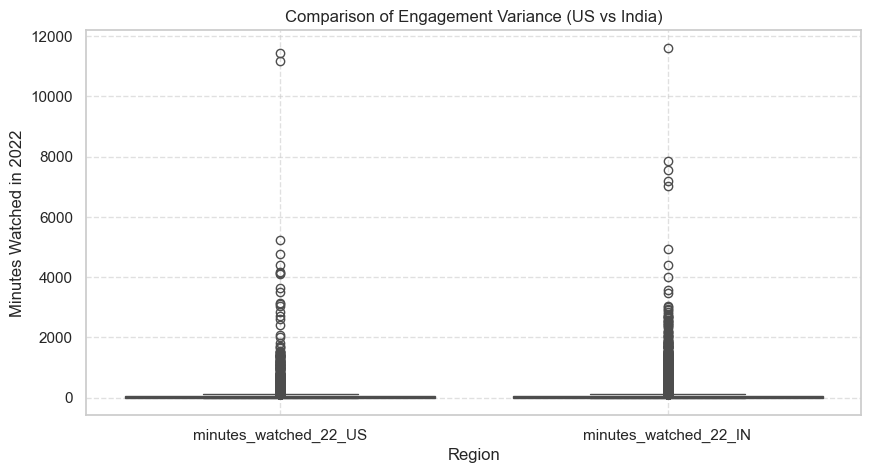

In [95]:
# Creating boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean[["minutes_watched_22_US", "minutes_watched_22_IN"]], palette=["blue", "orange"])
plt.title("Comparison of Engagement Variance (US vs India)")
plt.ylabel("Minutes Watched in 2022")
plt.xlabel("Region")
plt.grid(True, linestyle="--", alpha=0.6)

# Display
plt.show()

**Conclusion & Impact on Our T-Test**
- The variance in India’s engagement levels is much higher than in the US. This suggests that engagement in India is more spread out, with some students watching for much longer durations and others for very short durations.

- Since the p-value is significantly smaller than any common significance level (e.g. 0.05 or 0.01), we reject the null hypothesis that the variances of engagement in the US and India are equal. This suggests that the variance in minutes watched differs significantly between the two regions.

### 5.0 General Findings: Customer Engagement Statistical Analysis

- This study aimed to assess the impact of new platform features on student engagement for the 365Data Science company in 2022. These features—XP system, in-app coins, leaderboards, weekly rewards, and expanded course content—were expected to improve engagement levels. The analysis has revealed the following key insights:

1. **Overall Increase in Engagement:** There was a noticeable increase in minutes watched in 2022 compared to 2021, suggesting a positive impact from the new platform features.

2. **Engagement by Plan Type:** Paid users consistently showed higher engagement than free users, emphasizing the value of premium subscriptions.

3. **Regional Variations:** India exhibited higher engagement than the US, as confirmed by statistical tests.

4. **Engagement Trends:** The XP system and rewards-based features were correlated with consistent learning habits, as seen in students maintaining streaks.

5. **Data Challenges:** The dataset contained missing values, particularly for US engagement data, which were successfully handled using median imputation.

### 5.1 Recommendations
- Based on the findings, the following recommendations can help optimize customer engagement strategies:

1. **Personalized Learning Pathways:** Introduce AI-driven recommendations based on user behavior to enhance engagement further.

2. **Gamification Enhancements:** Expand reward structures, streak incentives, and achievement badges to encourage long-term learning habits.

3. **Regional-Specific Engagement Strategies:** Since India shows higher engagement, investigate content preferences, internet accessibility, and cultural learning patterns to adapt strategies for lower-engagement regions like the US.

4. **Paid vs. Free Model Optimization:** Consider freemium content upgrades where high-engagement free users are targeted with tailored promotions to convert them into paying customers.

5. **Continuous Data Monitoring:** Set up real-time engagement tracking dashboards to analyze behavioral trends and rapidly adjust platform strategies.

### 5.2 Conclusion
- The new platform features successfully enhanced student engagement in 2022. While overall engagement improved, the company can further refine its personalization, gamification, and regional engagement strategies to maximize impact.
- This project demonstrates the power of data-driven decision-making in improving customer engagement. By leveraging statistical analysis, companies can gain actionable insights to optimize user experiences and drive business growth.

### 5.3 Acknowledgment
This analysis was made possible through:
- 365Data Science Company’s Dataset – Providing anonymized student engagement data.
- Python Data Science Tools – Pandas, NumPy, Seaborn, SciPy, and Matplotlib for analysis and visualization.
- Statistical Techniques – T-tests, F-tests, and comparative analysis for hypothesis validation.